<a href="https://colab.research.google.com/github/Hemanth9336/Rain-Prediction-System-Using-Python/blob/main/RPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
import matplotlib
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

# Preprocessing and Exploratory Data Analysis



In [ ]:
#It is given in dataset, to drop Risk MM
df.drop(columns=['RISK_MM'],axis=1,inplace=True)

In [ ]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
#statistical properties
df.describe

<bound method NDFrame.describe of               Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
142188  2017-06-20    Uluru      3.5  ...     20.9         No            No
142189  2017-06-21    Uluru      2.8  ...     22.4         No            No
142190  2017-06-22    Uluru      3.6  ...     24.5         No            No
142191  2017-06-23    Uluru      5.4  ...     26.1         No            No
142192  2017-06-24    Uluru      7.8  ...     26.0         No            No

[142193 rows x 23 columns]>

In [ ]:
#Explore target variable, 'RainTomorrow
#Check missing values
df['RainTomorrow'].isna().sum()


0

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


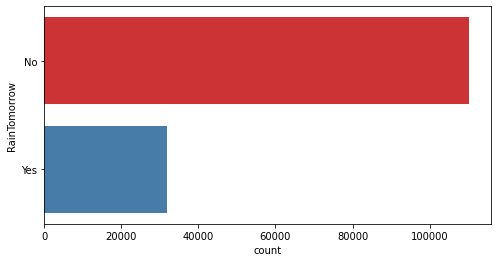

In [ ]:
#Check frequency distribution of values in RainTomorrow

print(df['RainTomorrow'].value_counts()/len(df))

f, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

In [ ]:
#Check missing values in entire dataframe, needs imputation
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
#check cardinality of categorical variables
cat = [col for col in df.columns if df[col].dtype=='O']
for col in cat: 
    
    print(col, ' contains ', len(df[col].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [ ]:
#date has high cardinality, so we will split in to d/m/y
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [ ]:
#preview dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [ ]:
#check for outliers
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Text(0, 0.5, 'WindSpeed3pm')

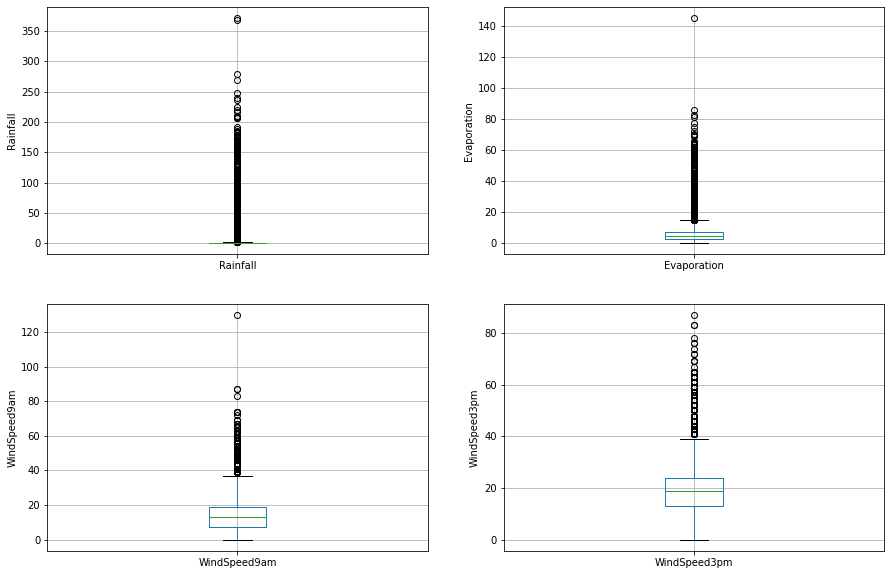

In [ ]:
#Rainfall, Evaporation , WindSpeed9am, WindSpeed3pm have clear outliers
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [ ]:
# we will use IQR to find outliers
#find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


# Multivariate Analysis

In [ ]:
df['RainToday'] = pd.get_dummies(df['RainToday'],drop_first=True)
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True)

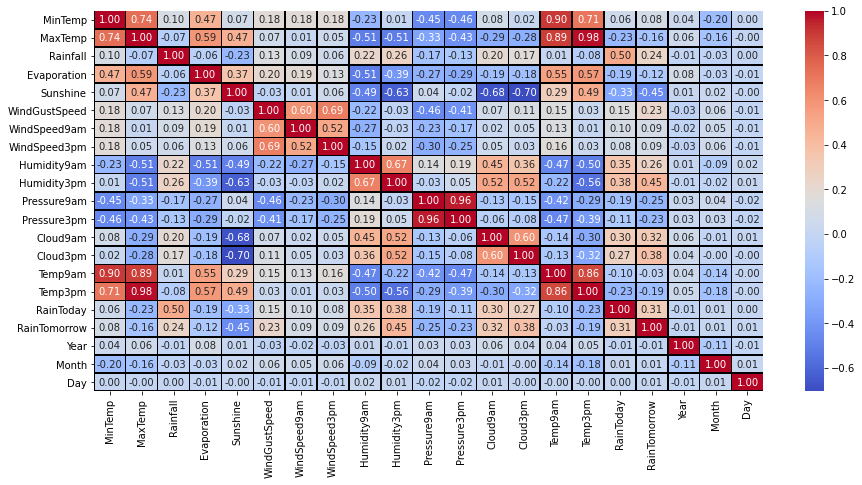

In [ ]:
#correlation heatmap
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

# Feature Engineering


In [ ]:
# declare features and target
# train_test_split
df_y = df['RainTomorrow']
df_X = df.drop(columns='RainTomorrow',axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(113754, 24)

In [ ]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          uint8
Year               int64
Month              int64
Day                int64
dtype: object

In [ ]:
#seperate into categorical features
cat = [col for col in X_train.columns if X_train[col].dtypes == 'object']
cat

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
#and numerical features
num = [col for col in X_train.columns if X_train[col].dtypes != 'object']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Year',
 'Month',
 'Day']

In [ ]:
#impute missing values with median for numerical data
for df1 in [X_train,X_test]:
    for col in num:
        df1[col].fillna(X_train[col].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#impute missing values with mode for categorical data
for df2 in [X_train,X_test]:
    for col in cat:
        df2[col].fillna(X_train[col].mode()[0], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#check missing values again
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [ ]:
#using outlier boundaries from earlier, we will cap maximum values of Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm

def max_boundary(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_boundary(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_boundary(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_boundary(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_boundary(df3, 'WindSpeed3pm', 57)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
#we can now see they have been capped
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,0.677010,5.143557,7.993989,39.895063,13.980124,18.629719,68.839434,51.480317,1017.646309,1015.252305,4.647652,4.701452,16.981340,21.67070,0.221891,2012.757802,6.400891,15.707826
std,6.384019,7.109859,1.185327,2.814837,2.758049,13.127684,8.815668,8.691237,18.944168,20.531492,6.750345,6.683925,2.292660,2.118964,6.470597,6.87257,0.415520,2.541504,3.423346,8.797404
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.40000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.70000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.30000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1038.900000,8.000000,9.000000,40.200000,46.70000,1.000000,2017.000000,12.000000,31.000000


In [ ]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
17969,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,19.0,22.0,38.0,68.0,1001.9,1002.4,5.0,5.0,19.8,14.3,0,2009,10,14
124769,Walpole,9.7,14.2,3.2,4.8,8.4,WSW,50.0,WNW,W,15.0,28.0,91.0,56.0,1008.2,1007.7,5.0,5.0,11.1,13.4,1,2011,9,26
39287,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,6.0,17.0,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0,0,2010,4,20
127749,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,30.0,35.0,52.0,45.0,1004.6,1001.4,5.0,5.0,11.1,12.9,0,2011,7,12
40651,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,15.0,20.0,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6,0,2015,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,Witchcliffe,9.0,18.9,3.2,4.8,8.4,W,43.0,WNW,W,20.0,15.0,70.0,52.0,1017.5,1017.7,5.0,5.0,15.8,17.6,1,2012,9,1
119879,Perth,13.1,19.9,3.0,1.2,2.3,SW,39.0,SW,W,2.0,13.0,90.0,55.0,1018.1,1018.2,7.0,7.0,15.4,19.1,1,2014,9,9
103694,Woomera,10.8,25.5,0.0,12.0,13.0,SSW,44.0,SSW,SSE,26.0,15.0,41.0,21.0,1015.7,1012.6,0.0,0.0,15.3,23.1,0,2010,12,20
131932,Launceston,11.3,21.4,0.0,4.8,8.4,ESE,39.0,SSE,SE,19.0,22.0,75.0,79.0,1017.6,1015.2,8.0,4.0,15.8,15.7,0,2014,11,5


In [ ]:
# Encode categorical features using One-Hot
    
X_train = pd.concat([X_train[num], 
pd.get_dummies(X_train['RainToday'],drop_first=True),
pd.get_dummies(X_train["Location"]),
pd.get_dummies(X_train["WindGustDir"],prefix='WindGustDir'),
pd.get_dummies(X_train["WindDir9am"],prefix='WindDir9am'),
pd.get_dummies(X_train["WindDir3pm"],prefix='WindDir3pm')], axis=1)

In [ ]:
#same for x_test
    
X_test = pd.concat([X_test[num], 
pd.get_dummies(X_test['RainToday'],drop_first=True),
pd.get_dummies(X_test["Location"]),
pd.get_dummies(X_test["WindGustDir"],prefix='WindGustDir'),
pd.get_dummies(X_test["WindDir9am"],prefix='WindDir9am'),
pd.get_dummies(X_test["WindDir3pm"],prefix='WindDir3pm')], axis=1)

In [ ]:
#all numerical data
X_train.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 17969 to 121958
Columns: 118 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int64(3), uint8(99)
memory usage: 28.1 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28439 entries, 56320 to 42917
Columns: 118 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int64(3), uint8(99)
memory usage: 7.0 MB


In [ ]:
#feature scaling - standardisation using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=[cols])
X_test = pd.DataFrame(scaler.transform(X_test),columns=[cols])


In [ ]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.458142,0.095453,-0.571161,-0.122053,0.147210,2.064725,0.569429,0.387781,-1.627919,0.804606,-2.332677,-1.922876,0.153686,0.140894,0.435612,-1.072486,-0.534010,-1.478581,1.051347,-0.194129,-0.534010,-0.149904,-0.147308,-0.146653,-0.146934,-0.145995,-0.147152,-0.14737,-0.151642,-0.145712,-0.157045,-0.146402,-0.146528,-0.145208,-0.151581,-0.146308,-0.151733,-0.106299,-0.148023,-0.132924,...,-0.258264,-0.266002,-0.259463,3.930993,-0.258012,-0.394315,-0.245011,-0.257702,-0.260484,-0.238987,-0.236324,-0.420763,-0.236655,-0.242847,-0.242481,3.962204,-0.252109,-0.261943,-0.260446,-0.235639,-0.248779,-0.248599,-0.231137,-0.223762,-0.250448,-0.239007,-0.250230,-0.254271,-0.2465,-0.217318,-0.239644,-0.251971,-0.269189,-0.335520,-0.263912,-0.24479,-0.262537,3.657265,-0.254349,-0.265167
1,-0.387724,-1.268856,2.128528,-0.122053,0.147210,0.769746,0.115690,1.078135,1.169788,0.220135,-1.399388,-1.129926,0.153686,0.140894,-0.908937,-1.203441,1.872623,-0.691642,0.759234,1.169916,1.872623,-0.149904,-0.147308,-0.146653,-0.146934,-0.145995,-0.147152,-0.14737,-0.151642,-0.145712,-0.157045,-0.146402,-0.146528,-0.145208,-0.151581,-0.146308,-0.151733,-0.106299,-0.148023,-0.132924,...,-0.258264,-0.266002,-0.259463,-0.254389,-0.258012,-0.394315,-0.245011,3.880448,-0.260484,-0.238987,-0.236324,-0.420763,-0.236655,-0.242847,-0.242481,-0.252385,-0.252109,-0.261943,-0.260446,-0.235639,-0.248779,-0.248599,4.326448,-0.223762,-0.250448,-0.239007,-0.250230,-0.254271,-0.2465,-0.217318,-0.239644,-0.251971,-0.269189,-0.335520,-0.263912,-0.24479,-0.262537,3.657265,-0.254349,-0.265167
2,0.160523,0.306428,-0.571161,-0.690472,0.292241,-0.753759,-0.905225,-0.187514,0.536345,0.561076,1.119013,0.934739,0.589863,0.140894,0.651977,0.338929,-0.534010,-1.085111,-0.701332,0.487893,-0.534010,-0.149904,-0.147308,-0.146653,-0.146934,-0.145995,-0.147152,-0.14737,-0.151642,-0.145712,-0.157045,-0.146402,-0.146528,-0.145208,-0.151581,-0.146308,-0.151733,-0.106299,-0.148023,-0.132924,...,-0.258264,-0.266002,-0.259463,-0.254389,-0.258012,-0.394315,-0.245011,-0.257702,-0.260484,-0.238987,-0.236324,-0.420763,-0.236655,-0.242847,-0.242481,-0.252385,-0.252109,-0.261943,-0.260446,-0.235639,-0.248779,4.022535,-0.231137,-0.223762,3.992844,-0.239007,-0.250230,-0.254271,-0.2465,-0.217318,-0.239644,-0.251971,-0.269189,-0.335520,-0.263912,-0.24479,-0.262537,-0.273428,-0.254349,-0.265167
3,-0.716672,-1.184466,-0.571161,-0.406262,-0.360397,4.121456,1.817213,1.883547,-0.888902,-0.315630,-1.932696,-2.072490,0.153686,0.140894,-0.908937,-1.276195,-0.534010,-0.691642,0.175008,-0.421470,-0.534010,-0.149904,-0.147308,-0.146653,-0.146934,-0.145995,-0.147152,-0.14737,-0.151642,-0.145712,-0.157045,-0.146402,-0.146528,-0.145208,-0.151581,-0.146308,6.590535,-0.106299,-0.148023,-0.132924,...,-0.258264,-0.266002,-0.259463,-0.254389,-0.258012,-0.394315,4.081443,-0.257702,-0.260484,-0.238987,-0.236324,-0.420763,-0.236655,-0.242847,-0.242481,-0.252385,-0.252109,-0.261943,-0.260446,-0.235639,-0.248779,-0.248599,4.326448,-0.223762,-0.250448,-0.239007,-0.250230,-0.254271,-0.2465,-

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import time
t0=time.time()

dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

y_pred= dtreemodel.predict(X_test)


from sklearn.metrics import accuracy_score
print("DECISION TREE")
model_DT_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_DT_accuracy))
model_DT_training = dtreemodel.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_DT_training))
model_DT_test = dtreemodel.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_DT_test))
model_DT_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_DT_time))

print(classification_report(y_test,y_pred))

DECISION TREE
Model accuracy score: 0.7872
Training set score: 1.0000
Test set score: 0.7872
Time Taken: 4.7135
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22098
           1       0.52      0.54      0.53      6341

    accuracy                           0.79     28439
   macro avg       0.69      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



True Positives=  18966
True Negatives=  3421
False Positives=  3132
False Negatives=  2920


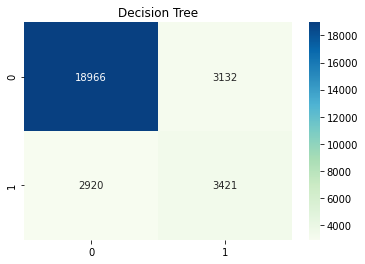

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('Decision Tree')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
t0=time.time()
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("RANDOM FOREST")
model_rf_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_rf_accuracy))
model_rf_training = rfc.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_rf_training))
model_rf_test = rfc.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_rf_test))
model_rf_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_rf_time))
print(classification_report(y_test,y_pred))

RANDOM FOREST
Model accuracy score: 0.8186
Training set score: 0.8197
Test set score: 0.8186
Time Taken: 38.5197
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     22098
           1       0.82      0.24      0.37      6341

    accuracy                           0.82     28439
   macro avg       0.82      0.61      0.63     28439
weighted avg       0.82      0.82      0.78     28439



True Positives=  21758
True Negatives=  1522
False Positives=  340
False Negatives=  4819


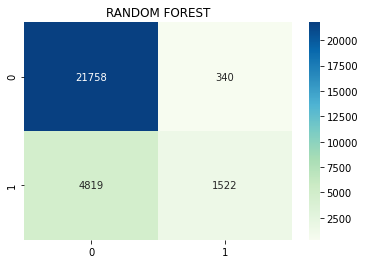

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('RANDOM FOREST')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')